In [24]:
# Compare CRM variables at single column between two simulations 
import cartopy.crs as ccrs
from math import cos, asin, sqrt
import matplotlib.pyplot as plt
from matplotlib import animation, rc
import numpy as np
import pickle
import xarray as xr
import netCDF4 as nc
from mpl_toolkits.basemap import Basemap
from matplotlib import ticker, cm
import sys
import types
from IPython.display import HTML
sys.setrecursionlimit(9000)

In [2]:
# Set the location of the column
Center_lons = np.array([270., 275.0, 280.])
Center_lat = -15.0
nx=len(Center_lons)

In [7]:
# Model output paths
PATH = '/scratch1/07088/tg863871/Control_testDX_CRM_output_NOtwin_v5_SP_ERA5_2008_F-MMF1_rrtmgp_frontera_ne16pg2_r05_oQU240_CRM1_32x_125z1600m.1s_crm_nx_rad_16_np_2048_nlev_125.frontera/run/'
PATH2 = '/scratch1/07088/tg863871/Control_testDX_CRM_output_NOtwin_v5_SP_ERA5_2008_F-MMF1_rrtmgp_frontera_ne16pg2_r05_oQU240_CRM1_32x_125z200m.1s_crm_nx_rad_16_np_2048_nlev_125.frontera/run/'

files = xr.open_mfdataset(PATH+"/*.cam.h0.2008-10-01-[01]*.nc")
files2 = xr.open_mfdataset(PATH2+"/*.cam.h0.2008-10-01-[01]*.nc")
lon = files.lon.isel(time=0).values
lat = files.lat.isel(time=0).values
Z3  = files.Z3.isel(time=0).values

(125, 6144)

In [30]:
# Function calculate thedistance between two points
def distance(lat1, lon1, lat2, lon2):
    p = 0.017453292519943295
    a = 0.5 - cos((lat2-lat1)*p)/2 + cos(lat1*p)*cos(lat2*p) * (1-cos((lon2-lon1)*p)) / 2
    return 12742 * asin(sqrt(a))

In [31]:
# Find the column index corresponds to the minimum distance
ncols = np.empty(shape=nx)
for ix in range(nx-1):
    ddmin = 99999999.0
    for il in range(4166):
        dd = distance(lat[il], lon[il], Center_lat, Center_lons[ix])
        if dd<ddmin:
            ddmin = dd
            minindex = il
    ncols[ix] = int(minindex)

ncols = ncols.astype(int)

In [32]:
def animate_2D():
#         print(icol)
#        print (type(icol))
    fig, ax = plt.subplots(2,nx,figsize=(10,10))
#        fig, ax = plt.subplots(figsize=(20, 10))
    def animate(i):
        for ix in range(nx-1):
            icol = ncols[ix]
            I = files.CRM_T.isel(ncol=icol).isel(time=i).plot(ax=ax[0,ix], add_colorbar=False)
          #  return (I,)
        plt.close()   # Not necessary but will avoid a stray figure popping up
    return animation.FuncAnimation(fig, animate, frames=files.time.size, interval=150, blit=True)

Traceback (most recent call last):
  File "/home1/07088/tg863871/anaconda3/envs/Griffin_cpu/lib/python3.7/site-packages/matplotlib/cbook/__init__.py", line 216, in process
    func(*args, **kwargs)
  File "/home1/07088/tg863871/anaconda3/envs/Griffin_cpu/lib/python3.7/site-packages/matplotlib/animation.py", line 953, in _start
    self._init_draw()
  File "/home1/07088/tg863871/anaconda3/envs/Griffin_cpu/lib/python3.7/site-packages/matplotlib/animation.py", line 1523, in _init_draw
    artist.set_visible(False)
AttributeError: 'QuadContourSet' object has no attribute 'set_visible'


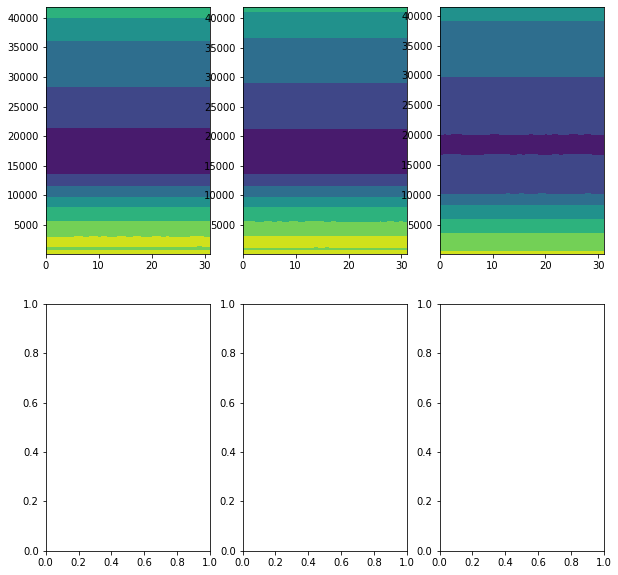

In [28]:
fig, ax = plt.subplots(2,nx,figsize=(10,10))
figs = []
x      = list(range(0,32))
levels = np.linspace(270, 295, 100)
for it in range(files.time.size-1):
   # for ix in range(nx-1):
    #    icol = ncols[ix]
    Z3p1 = Z3[:,ncols[0]]
    Z3p1 = Z3p1[::-1]
    Z3p2 = Z3[:,ncols[1]]
    Z3p2 = Z3p2[::-1]
    Z3p3 = Z3[:,ncols[2]]
    Z3p3 = Z3p3[::-1]
    I0 = np.squeeze(files.CRM_T.isel(ncol=ncols[0]).isel(time=it).values)
    I1 = np.squeeze(files.CRM_T.isel(ncol=ncols[1]).isel(time=it).values)
    I2 = np.squeeze(files.CRM_T.isel(ncol=ncols[2]).isel(time=it).values)
    I0.shape
    cs0 = ax[0,0].contourf(x,Z3p1,I0)
    cs1 = ax[0,1].contourf(x,Z3p2,I1)
    cs2 = ax[0,2].contourf(x,Z3p3,I2)
    figs.append([cs0,cs1,cs2])

#animation.FuncAnimation(fig, figs, frames=files.time.size, interval=150, blit=True)
ani = animation.ArtistAnimation(fig, figs, interval=150, blit=False, repeat=True)
#ani.save("testy.mp4")